#### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import scipy as math
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

# from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras

from keras.models import Model, Sequential
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.optimizers import Adam
import detect_edges 
import os
from imageio import imread

/Users/sam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


#### Load in validation data

In [2]:
validation_path = '../data/asl_alphabet_validation'

Raw images for visual inspection of masks

In [3]:
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O',
          'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
img_paths = []
for i in range(len(letters)):
    letter = letters[i]
    path = os.path.join(validation_path, letter)
    img_title = letter + '_test.jpg'
    img_path = os.path.join(path, img_title)
    img_paths.append(img_path)

Data generator for model evaluation

In [4]:
image_size = 200
batch_size = 32
valgen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, preprocessing_function=detect_edges.predict_custom_image) 
val_generator = valgen.flow_from_directory(
                validation_path,  # directory for validation images
                target_size=(image_size, image_size),
                batch_size=batch_size,
                class_mode='categorical',
                color_mode='grayscale',
                shuffle=False)

Found 30 images belonging to 29 classes.


#### Edge detection quick look

In [5]:
models_path = '../models/'

In [6]:
edger_path = os.path.join(models_path, 'edge_detect/unet2.keras')
edger = load_model(edger_path)

In [7]:
arrs = []
for i in range(len(img_paths)):
    path = img_paths[i]
    image = imread(path)
    image = detect_edges.predict_custom_image(image)
    arrs.append(image)
    
# un-colapse the output box to see the generated masks for each sign

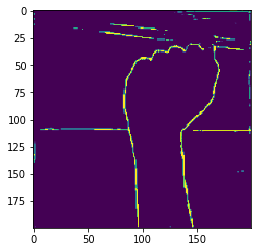

In [8]:
plt.imshow(array_to_img(val_generator[0][0][0]))

#### Load in our classifier model

In [15]:

# del classifier
classifier_path = os.path.join(models_path,'model19.keras')
classifier = load_model(classifier_path)

In [16]:
classifier.evaluate_generator(val_generator)

InvalidArgumentError: Tensor input_1:0, specified in either feed_devices or fetch_devices was not found in the Graph

In [12]:
del classifier

In [ ]:
preds = []
for pred in classifier.predict_generator(val_generator, verbose=1):
    preds.append(np.argmax(pred) + 1)
true = val_generator.classes

In [35]:
print(list(true))
print(preds)

[1, 2, 3, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 27, 28]
[6, 10, 14, 14, 10, 14, 3, 6, 6, 6, 6, 6, 6, 10, 3, 14, 18, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
